In [2]:
import tensorflow as tf

batch_size = 32
img_size = 224

data_dir = "train_images"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=32)

Found 2842 files belonging to 3 classes.
Using 2558 files for training.
Found 2842 files belonging to 3 classes.
Using 284 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)

['apple', 'lg', 'samsung']


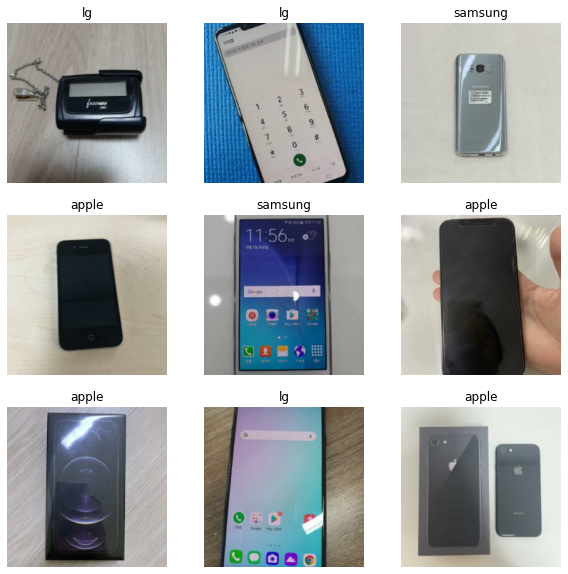

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [5]:
len(train_ds)

80

In [6]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [46]:
import numpy as np
from tensorflow.keras import layers, regularizers

input_shape = ()
num_classes = len(class_names)
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 64)       

In [49]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
baseline_history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
80/80 [==============================] - 49s 600ms/step - loss: 1.5304 - accuracy: 0.3482 - val_loss: 1.3069 - val_accuracy: 0.3592
Epoch 2/10
68/80 [========================>.....] - ETA: 6s - loss: 1.2844 - accuracy: 0.3431

KeyboardInterrupt: 

In [43]:
def plot_history(histories):
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 1, 1)
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_loss'], '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(), label=name.title() + ' Train')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_accuracy'], '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history['accuracy'], color=val[0].get_color(), label=name.title() + ' Train')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])

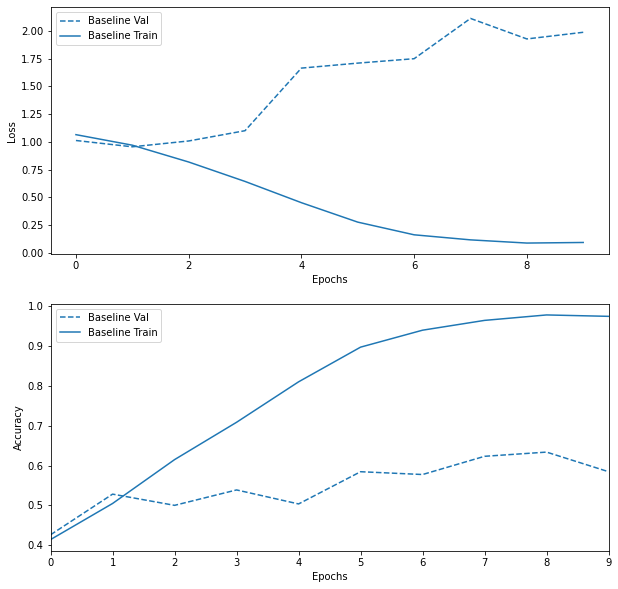

In [44]:
plot_history([('baseline', baseline_history)])